In [31]:
import os

In [4]:
from torch_geometric.datasets import TUDataset
if 'IS_GRADESCOPE_ENV' not in os.environ:
  root = './enzymes'
  name = 'ENZYMES'

  # The ENZYMES dataset
  pyg_dataset= TUDataset(root, name)

  # You will find that there are 600 graphs in this dataset
  print(pyg_dataset)

Processing...


ENZYMES(600)


Done!


# PyTorch Geometric (Datasets and Data)
##  Question 1: What is the number of classes and number of features in the ENZYMES dataset? (5 points) 

In [7]:
def get_num_classes(pyg_dataset):
    # TODO: Implement a function that takes a PyG dataset object
    # and returns the number of classes for that dataset.
  
    num_classes = 0
  
    ############# Your code here ############
    ## (~1 line of code)
    ## Note
    num_classes = pyg_dataset.num_classes
  
    #########################################
  
    return num_classes
  
def get_num_features(pyg_dataset):
    # TODO: Implement a function that takes a PyG dataset object
    # and returns the number of features for that dataset.
  
    num_features = 0
  
    ############# Your code here ############
    ## (~1 line of code)
    ## Note
    num_features = pyg_dataset.num_node_features
    #########################################
  
    return num_features

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_classes = get_num_classes(pyg_dataset)
  num_features = get_num_features(pyg_dataset)
  print("{} dataset has {} classes".format(name, num_classes))
  print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


每个 PyG 数据集都存储一个 torch_geometric.data.Data 对象列表，其中每个 torch_geometric.data.Data 对象代表一个图形。我们可以通过索引数据集来轻松获取 Data 对象。
## Question 2: What is the label of the graph with index 100 in the ENZYMES dataset? (5 points)

In [12]:
def get_graph_class(pyg_dataset, idx):
    # TODO: Implement a function that takes a PyG dataset object,
    # an index of a graph within the dataset, and returns the class/label
    # of the graph (as an integer).
    
    label = -1
    
    ############# Your code here ############
    ## (~1 line of code)
    label = pyg_dataset[idx].y.item()
    #########################################
    
    return label
    
# Here pyg_dataset is a dataset for graph classification
if 'IS_GRADESCOPE_ENV' not in os.environ:
    graph_0 = pyg_dataset[0]
    print(graph_0)
    idx = 100
    label = get_graph_class(pyg_dataset, idx)
    print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 168], x=[37, 3], y=[1])
Graph with index 100 has label 4


pyg_dataset[0]是一个torch_geometric.data.Data对象，它代表一个图形。这个对象有几个属性，包括x、edge_index、edge_attr、y、pos和num_nodes。这些属性分别代表节点特征张量、边索引张量、边属性张量、标签、节点位置张量和节点数。在这个例子中，我们看到这个图形有37个节点，每个节点有3个特征，标签为6。这个图形的边索引张量是一个2x168的张量，表示图形中的边。这个图形的节点位置张量是一个37x3的张量，表示节点的位置。

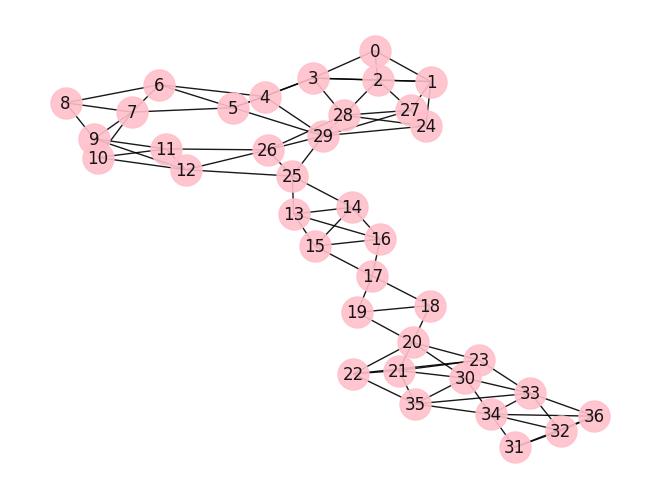

In [20]:
# 可视化第一个图形
import networkx as nx
import matplotlib.pyplot as plt
import torch

def visualize_graph(pyg_data):
    G = nx.Graph()
    edge_index = pyg_data.edge_index
    edges = edge_index.t().tolist()
    G.add_edges_from(edges)
    # layout 
    pos = nx.kamada_kawai_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='pink', alpha=0.9,
            labels={node: node for node in G.nodes()})

visualize_graph(pyg_dataset[0])

## Question 3: How many edges does the graph with index 200 have? (5 points)

In [26]:
def get_graph_num_edges(pyg_dataset, idx):
    # TODO: Implement a function that takes a PyG dataset object,
    # the index of a graph in the dataset, and returns the number of
    # edges in the graph (as an integer). You should not count an edge
    # twice if the graph is undirected. For example, in an undirected
    # graph G, if two nodes v and u are connected by an edge, this edge
    # should only be counted once.
    
    num_edges = 0
    
    ############# Your code here ############
    ## Note:
    ## 1. You can't return the data.num_edges directly
    ## 2. We assume the graph is undirected
    ## 3. Look at the PyG dataset built in functions
    ## (~4 lines of code)
    num_edges = pyg_dataset[idx].edge_index.shape[1] // 2
    
    #########################################
    
    return num_edges

idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('Graph with index {} has {} edges'.format(idx, num_edges))

Graph with index 200 has 53 edges


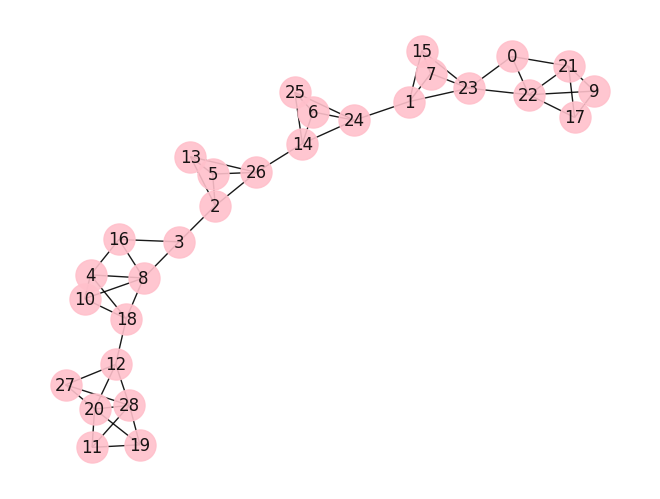

In [24]:
visualize_graph(pyg_dataset[200])

In [27]:
pyg_dataset[idx].edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,
          5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10,
         10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15,
         15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20,
         20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24,
         24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28],
        [21, 22, 23,  7, 15, 23, 24,  3,  5, 13, 26,  2,  8, 16,  8, 10, 16, 18,
          2, 13, 26, 14, 24, 25,  1, 15, 23,  3,  4, 10, 16, 18, 17, 21, 22,  4,
          8, 18, 19, 20, 28, 18, 20, 27, 28,  2,  5, 26,  6, 24, 25, 26,  1,  7,
         23,  3,  4,  8,  9, 21, 22,  4,  8, 10, 12, 11, 20, 28, 11, 12, 19, 27,
         28,  0,  9, 17, 22,  0,  9, 17, 21, 23,  0,  1,  7, 15, 22,  1,  6, 14,
         25,  6, 14, 24,  2,  5, 13, 14, 12, 20, 28, 11, 12, 19, 20, 27]])

#  Open Graph Benchmark (OGB)
开放图形基准测试 （OGB） 是一组真实、大规模和多样化的基准测试数据集，用于图形上的机器学习。其数据集使用 OGB Data Loader 自动下载、处理和拆分。然后，可以使用 OGB Evaluator 以统一的方式评估模型性能。

In [28]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
# Load the dataset and transform it to sparse tensor
dataset = PygNodePropPredDataset(name=dataset_name,
                                transform=T.ToSparseTensor())
print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

Downloaded 0.08 GB: 100%|██████████| 81/81 [01:19<00:00,  1.02it/s]
Processing...


Extracting dataset\arxiv.zip
Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<?, ?it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 999.36it/s]

Saving...
The ogbn-arxiv dataset has 1 graph



Done!
D:\Program\Anaconda\envs\cs224\lib\site-packages\ogb\nodeproppred\dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load

Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


In [ ]:
## Question 4: What is the number of features in the ogbn-arxiv dataset? (5 points)

In [29]:
def graph_num_features(data):
    # TODO: Implement a function that takes a PyG data object,
    # and returns the number of features in the graph (as an integer).
    
    num_features = 0
    
    ############# Your code here ############
    ## (~1 line of code)
    num_features = data.num_features
    
    #########################################
    
    return num_features

num_features = graph_num_features(data)
print('The graph has {} features'.format(num_features))

The graph has 128 features


# GNN: Node Property Prediction
在本节中，我们将使用 PyTorch Geometric 构建我们的第一个图形神经网络。然后，我们将它应用于节点属性预测（节点分类）的任务。具体来说，我们将使用 GCN 作为图神经网络的基础 （ Kipf et al. （2017））。为此，我们将使用 PyG 的内置 GCNConv 层。

In [30]:
import torch
import pandas as pd
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

2.4.1+cu121


In [37]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name, transform=T.ToSparseTensor())
data = dataset[0]

# Make the adjacency matrix to symmetric # 这一步是为了将邻接矩阵转换为对称矩阵
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

data = data.to(device)
split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

D:\Program\Anaconda\envs\cs224\lib\site-packages\ogb\nodeproppred\dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.p

Device: cuda


ogbn-arxiv数据集是有向图，表示arxiv网站上所有计算机相关论文引用网络。

每个节点就是一篇arxiv论文，每条边都表示一篇文章引用另一篇文章。每篇文章有128维的特征向量，这是将文章的标题以及摘要向量化后取平均得到。

使用的embedding是通过skip-gram模型在MAG语料获得，同时，还有论文的发表年份信息。


In [50]:
# 描述一下数据集ogbn-arxiv
print(data)
# 数据集一共有169343个节点，每个节点有128维特征，node_year是节点的年份，y是节点的标签，edge_index是边的索引，edge_weight是边的权重，adj_t是邻接矩阵，split是数据集的划分。
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features: {data.num_features}")
print(f"Number of classes: {dataset.num_classes}")
# year
print(f"Year: {data.node_year}")

Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=2315598])
Number of nodes: 169343
Number of edges: 2315598
Number of features: 128
Number of classes: 40
Year: tensor([[2013],
        [2015],
        [2014],
        ...,
        [2020],
        [2020],
        [2020]], device='cuda:0')


In [54]:
# train
print(f"Train shape: {split_idx['train'].shape}")
# valid
print(f"Valid shape: {split_idx['valid'].shape}")
# test
print(f"Test shape: {split_idx['test'].shape}")

Train shape: torch.Size([90941])
Valid shape: torch.Size([29799])
Test shape: torch.Size([48603])


In [59]:
data.adj_t
# 有向图
# 解析一下adj_t
# adj_t是一个SparseTensor，表示邻接矩阵。
# 如何读取adj_t呢？
# adj_t有三个属性，row, col, size
# row表示边的起始节点，col表示边的终止节点，size表示邻接矩阵的大小

SparseTensor(row=tensor([     0,      0,      0,  ..., 169341, 169342, 169342], device='cuda:0'),
             col=tensor([   411,    640,   1162,  ..., 163274,  27824, 158981], device='cuda:0'),
             size=(169343, 169343), nnz=2315598, density=0.01%)

## GCN Model

Now we will implement our GCN model!

Please follow the figure below to implement the `forward` function.

![test](./assets/gcn.png)

In [74]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement a function that initializes self.convs,
        # self.bns, and self.softmax.

        super(GCN, self).__init__()

        # A list of GCNConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and
        ## 'out_channels'. For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        self.convs = torch.nn.ModuleList(
            [GCNConv(input_dim, hidden_dim)] + 
            [GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)] + 
            [GCNConv(hidden_dim, output_dim)]
        )
        self.bns = torch.nn.ModuleList(
            [torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)]
        )
        self.softmax = torch.nn.LogSoftmax()
        #########################################

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.
        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as shown in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        for i, conv in enumerate(self.convs[:-1]):
            # print(f"Conv: {i}", x.shape)
            x = conv(x, adj_t)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, adj_t)
        if not self.return_embeds:
            x = self.softmax(x)
        out = x
        #########################################

        return out

In [75]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement a function that trains the model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slice the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)
    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    loss = loss_fn(out[train_idx], data.y[train_idx].reshape(-1))

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [76]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator, save_model_results=False):
    # TODO: Implement a function that tests the model by
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out = model(data.x, data.adj_t)
    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_node.csv', sep=',', index=False)


    return train_acc, valid_acc, test_acc

In [77]:
# Please do not change the args
# if 'IS_GRADESCOPE_ENV' not in os.environ:
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [78]:
# Please do not change these args
# Training should take <10min using GPU runtime
import copy
if 'IS_GRADESCOPE_ENV' not in os.environ:
  # reset the parameters to initial random value
  model.reset_parameters()

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_model = None
  best_valid_acc = 0

  for epoch in range(1, 1 + args["epochs"]):
    loss = train(model, data, train_idx, optimizer, loss_fn)
    result = test(model, data, split_idx, evaluator)
    train_acc, valid_acc, test_acc = result
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        best_model = copy.deepcopy(model)
    print(f'Epoch: {epoch:02d}, '
          f'Loss: {loss:.4f}, '
          f'Train: {100 * train_acc:.2f}%, '
          f'Valid: {100 * valid_acc:.2f}% '
          f'Test: {100 * test_acc:.2f}%')

Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])


D:\Program\Anaconda\envs\cs224\lib\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Epoch: 01, Loss: 4.0584, Train: 26.76%, Valid: 29.51% Test: 26.44%
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Epoch: 02, Loss: 2.4201, Train: 24.65%, Valid: 22.08% Test: 27.35%
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Epoch: 03, Loss: 1.9810, Train: 24.63%, Valid: 21.44% Test: 26.07%
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Epoch: 04, Loss: 1.8303, Train: 27.92%, Valid: 25.14% Test: 23.31%
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Epoch: 05, Loss: 1.6796, Train: 34.01%, Valid: 31.79% Test: 29.76%
Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size(

In [79]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_result = test(best_model, data, split_idx, evaluator, save_model_results=True)
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Conv: 0 torch.Size([169343, 128])
Conv: 1 torch.Size([169343, 256])
Saving Model Predictions
Best model: Train: 73.51%, Valid: 71.80% Test: 71.05%


# GNN: Graph Property Prediction
在本节中，我们将创建一个用于图属性预测（图分类）的图神经网络。

In [82]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm
# 禁止warning
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

split_idx = dataset.get_idx_split()

# Check task type
print('Task type: {}'.format(dataset.task_type))

Device: cuda
Task type: binary classification


In [83]:
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

In [85]:
args = {
    'device': device,
    'num_layers': 5,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cuda',
 'num_layers': 5,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.001,
 'epochs': 30}

In [ ]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        self.pool = None

        ############# Your code here ############
        ## Note:
        ## 1. Initialize self.pool as a global mean pooling layer
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        self.pool = global_mean_pool
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        # TODO: Implement a function that takes as input a
        # mini-batch of graphs (torch_geometric.data.Batch) and
        # returns the predicted graph property for each graph.
        #
        # NOTE: Since we are predicting graph level properties,
        # your output will be a tensor with dimension equaling
        # the number of graphs in the mini-batch


        # Extract important attributes of our mini-batch
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct node embeddings using existing GCN model
        ## 2. Use the global pooling layer to aggregate features for each individual graph
        ## For more information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Use a linear layer to predict each graph's property
        ## (~3 lines of code)
        node_embeddings = self.gnn_node(embed, edge_index)
        graph_embeddings = self.pool(node_embeddings, batch)
        out = self.linear(graph_embeddings)
        #########################################

        return out